In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [3]:
df = pd.read_csv("shopping_trends.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
2989,2990,46,Female,Belt,Accessories,20,Rhode Island,XL,Teal,Summer,4.30,No,Cash,2-Day Shipping,No,No,6,Credit Card,Weekly
1614,1615,30,Male,T-shirt,Clothing,41,Kansas,S,Gray,Summer,3.40,No,Cash,Free Shipping,Yes,Yes,22,Cash,Bi-Weekly
1337,1338,37,Male,Sweater,Clothing,86,Tennessee,L,Silver,Spring,3.40,No,Venmo,Express,Yes,Yes,19,Credit Card,Bi-Weekly
2990,2991,69,Female,Shirt,Clothing,91,Illinois,M,Teal,Fall,4.20,No,Venmo,Free Shipping,No,No,24,Venmo,Monthly
274,275,59,Male,Jewelry,Accessories,32,Maryland,M,Indigo,Spring,3.00,Yes,Credit Card,Express,Yes,Yes,28,Cash,Bi-Weekly


Number of Female Customers: 1248
Number of Male Customers: 2652


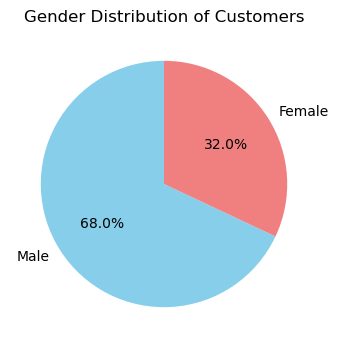

In [61]:
# Count the number of female and male customers
gender_counts = df['Gender'].value_counts()

# Print the number of female and male customers
print("Number of Female Customers:", gender_counts['Female'])
print("Number of Male Customers:", gender_counts['Male'])

# Create a pie chart to visualize the percentage of female and male customers
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Customers')
plt.show()


In [62]:
# Separate the data into two DataFrames based on gender
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

In [63]:
male_data.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Group
130,131,44,Male,Scarf,Accessories,39,Kentucky,L,Violet,Fall,3.70,Yes,Credit Card,Next Day Air,Yes,Yes,13,PayPal,Fortnightly,41-60
1410,1411,61,Male,Hat,Accessories,93,Tennessee,M,Purple,Summer,4.00,No,Venmo,Store Pickup,Yes,Yes,18,Debit Card,Annually,61-80
1671,1672,31,Male,Hoodie,Clothing,22,Utah,M,Olive,Winter,4.00,No,PayPal,Free Shipping,Yes,Yes,25,Bank Transfer,Weekly,18-40
129,130,24,Male,Dress,Clothing,67,Pennsylvania,XL,Olive,Summer,4.20,Yes,Cash,2-Day Shipping,Yes,Yes,49,PayPal,Bi-Weekly,18-40
394,395,43,Male,Scarf,Accessories,29,North Dakota,M,Beige,Spring,4.80,Yes,PayPal,Store Pickup,Yes,Yes,7,Debit Card,Bi-Weekly,41-60


In [64]:
female_data.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Group
2877,2878,32,Female,Socks,Clothing,46,New Jersey,M,Silver,Summer,3.60,No,PayPal,Standard,No,No,34,Venmo,Monthly,18-40
3047,3048,21,Female,Sneakers,Footwear,74,Vermont,M,Violet,Fall,4.10,No,Cash,2-Day Shipping,No,No,3,PayPal,Bi-Weekly,18-40
3273,3274,58,Female,Belt,Accessories,45,Nevada,S,Orange,Summer,2.60,No,Credit Card,Free Shipping,No,No,34,PayPal,Every 3 Months,41-60
3721,3722,62,Female,Coat,Outerwear,60,Connecticut,L,Pink,Fall,4.00,No,Credit Card,Next Day Air,No,No,10,Cash,Annually,61-80
3638,3639,40,Female,Backpack,Accessories,20,Kansas,M,Olive,Spring,4.60,No,Credit Card,Express,No,No,50,PayPal,Bi-Weekly,41-60


In [65]:
# Function to find the most sold item, color, and size for each gender
def most_sold_stats(data):
    most_sold_item = data['Item Purchased'].mode().iloc[0]
    most_sold_color = data['Color'].mode().iloc[0]
    most_sold_size = data['Size'].mode().iloc[0]
    
    return most_sold_item, most_sold_color, most_sold_size

# Find the most sold item, color, and size for each gender
male_most_sold_item, male_most_sold_color, male_most_sold_size = most_sold_stats(male_data)
female_most_sold_item, female_most_sold_color, female_most_sold_size = most_sold_stats(female_data)

# Display the results
print("Most Sold Item, Color, and Size for Males:")
print(f"Item: {male_most_sold_item}, Color: {male_most_sold_color}, Size: {male_most_sold_size}")

print("\nMost Sold Item, Color, and Size for Females:")
print(f"Item: {female_most_sold_item}, Color: {female_most_sold_color}, Size: {female_most_sold_size}")


Most Sold Item, Color, and Size for Males:
Item: Pants, Color: Silver, Size: M

Most Sold Item, Color, and Size for Females:
Item: Blouse, Color: Yellow, Size: M


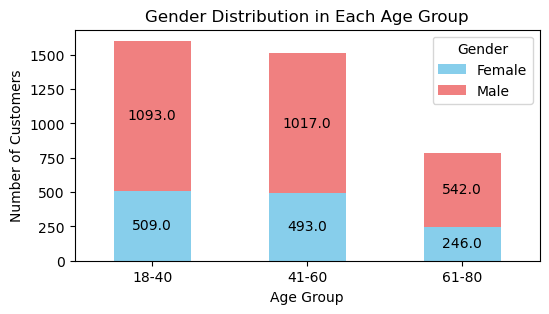

In [70]:
# Define age groups
bins = [18, 40, 60, 80]
labels = ['18-40', '41-60', '61-80']

# Create a new column 'Age Group' based on age bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the number of customers for each gender within each age group
gender_age_counts = df.groupby(['Age Group', 'Gender']).size().unstack()

# Create a stacked bar chart to visualize the gender distribution in each age group
ax = gender_age_counts.plot(kind='bar', stacked=True, figsize=(6, 3), color=['skyblue', 'lightcoral'])

# Annotate each bar with the corresponding numbers
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Gender Distribution in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Gender', loc='upper right')
plt.show()


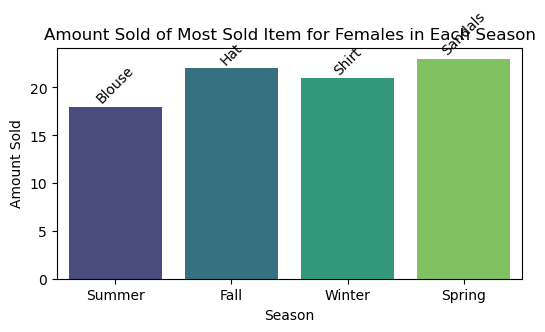

In [71]:
# Function to find the most sold item and its amount for each season
def most_sold_item_amount(data):
    most_sold_item = data['Item Purchased'].mode().iloc[0]
    amount_sold = data[data['Item Purchased'] == most_sold_item].shape[0]
    
    return most_sold_item, amount_sold

# Find the most sold item and its amount for each season in the female dataset
seasons = female_data['Season'].unique()

most_sold_items = []
amounts_sold = []

for season in seasons:
    season_data = female_data[female_data['Season'] == season]
    most_sold_item, amount_sold = most_sold_item_amount(season_data)
    
    most_sold_items.append(most_sold_item)
    amounts_sold.append(amount_sold)

# Create a histogram with annotations
plt.figure(figsize=(6, 3))
ax = sns.barplot(x=seasons, y=amounts_sold, palette='viridis')

# Annotate each bar with the most sold item
for i, amount in enumerate(amounts_sold):
    ax.text(i, amount + 0.1, most_sold_items[i], ha='center', va='bottom', rotation=45)

plt.title('Amount Sold of Most Sold Item for Females in Each Season')
plt.xlabel('Season')
plt.ylabel('Amount Sold')
plt.show()




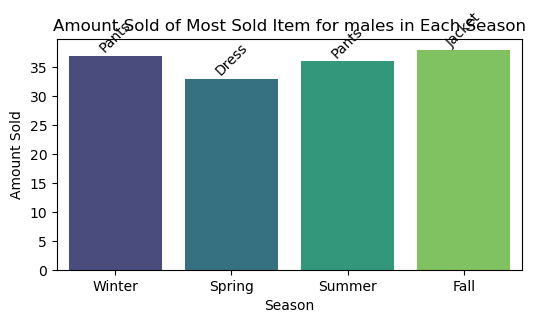

In [23]:
# Function to find the most sold item and its amount for each season
def most_sold_item_amount(data):
    most_sold_item = data['Item Purchased'].mode().iloc[0]
    amount_sold = data[data['Item Purchased'] == most_sold_item].shape[0]
    
    return most_sold_item, amount_sold

# Find the most sold item and its amount for each season in the male dataset
seasons = male_data['Season'].unique()

most_sold_items = []
amounts_sold = []

for season in seasons:
    season_data = male_data[male_data['Season'] == season]
    most_sold_item, amount_sold = most_sold_item_amount(season_data)
    
    most_sold_items.append(most_sold_item)
    amounts_sold.append(amount_sold)

# Create a histogram with annotations
plt.figure(figsize=(6, 3))
ax = sns.barplot(x=seasons, y=amounts_sold, palette='viridis')

# Annotate each bar with the most sold item
for i, amount in enumerate(amounts_sold):
    ax.text(i, amount + 0.1, most_sold_items[i], ha='center', va='bottom', rotation=45)

plt.title('Amount Sold of Most Sold Item for males in Each Season')
plt.xlabel('Season')
plt.ylabel('Amount Sold')
plt.show()



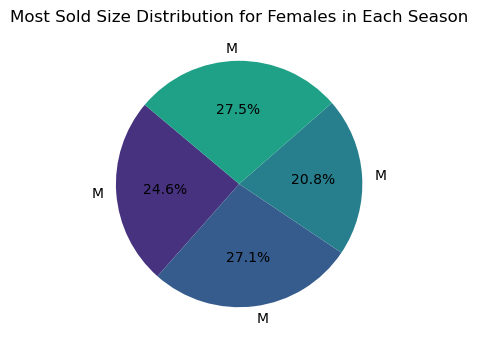

In [73]:

# Function to find the most sold size and its amount for each season
def most_sold_size_amount(data):
    most_sold_size = data['Size'].mode().iloc[0]
    amount_sold = data[data['Size'] == most_sold_size].shape[0]
    
    return most_sold_size, amount_sold

# Find the most sold size and its amount for each season in the female dataset
seasons = female_data['Season'].unique()

most_sold_sizes = []
amounts_sold = []

for season in seasons:
    season_data = female_data[female_data['Season'] == season]
    most_sold_size, amount_sold = most_sold_size_amount(season_data)
    
    most_sold_sizes.append(most_sold_size)
    amounts_sold.append(amount_sold)

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(amounts_sold, labels=most_sold_sizes, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Most Sold Size Distribution for Females in Each Season')
plt.show()



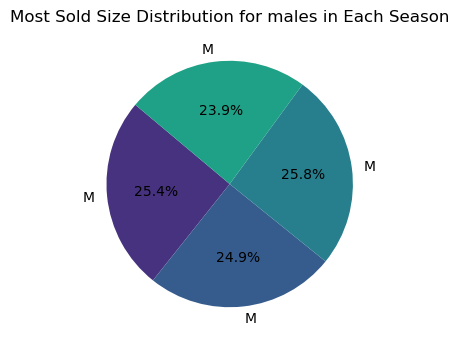

In [86]:
# Find the most sold size and its amount for each season in the male dataset
seasons = male_data['Season'].unique()

most_sold_sizes = []
amounts_sold = []

for season in seasons:
    season_data = male_data[male_data['Season'] == season]
    most_sold_size, amount_sold = most_sold_size_amount(season_data)
    
    most_sold_sizes.append(most_sold_size)
    amounts_sold.append(amount_sold)

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(amounts_sold, labels=most_sold_sizes, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Most Sold Size Distribution for males in Each Season')
plt.show()

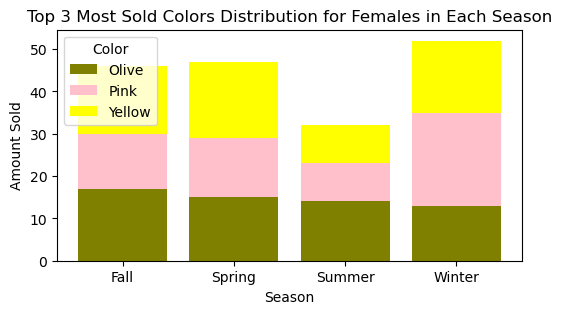

In [75]:


# Function to find the top 3 most sold colors and their amounts for each season
def top_colors_amount(data, top_n=3):
    top_colors = data['Color'].value_counts().nlargest(top_n).index
    colors_data = data[data['Color'].isin(top_colors)]
    
    pivot_table = pd.pivot_table(colors_data, values='Customer ID', index='Season', columns='Color', aggfunc='count', fill_value=0)
    
    return pivot_table

# Find the top 3 most sold colors for each season in the female dataset
top_colors_by_season = top_colors_amount(female_data)

# Custom color palette (olive, pink, yellow)
custom_palette = sns.color_palette(['olive', 'pink', 'yellow'])

# Create stacked bar charts with custom colors
plt.figure(figsize=(6, 3))

for i, color in enumerate(top_colors_by_season.columns):
    plt.bar(top_colors_by_season.index, top_colors_by_season[color], label=color, bottom=top_colors_by_season.iloc[:, :i].sum(axis=1), color=custom_palette[i])

plt.title('Top 3 Most Sold Colors Distribution for Females in Each Season')
plt.xlabel('Season')
plt.ylabel('Amount Sold')
plt.legend(title='Color')
plt.show()


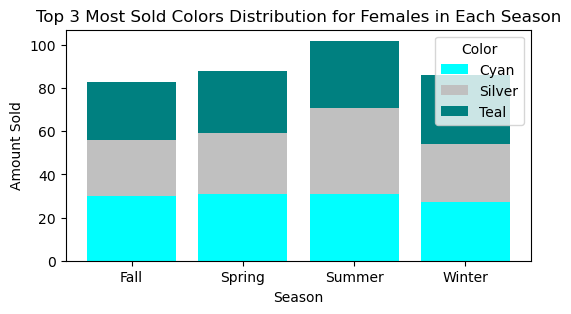

In [76]:
# Find the top 3 most sold colors for each season in the female dataset
top_colors_by_season = top_colors_amount(male_data)

# Custom color palette (cyan, silver, teal)
custom_palette = sns.color_palette(['cyan', 'silver', 'teal'])

# Create stacked bar charts with custom colors
plt.figure(figsize=(6, 3))

for i, color in enumerate(top_colors_by_season.columns):
    plt.bar(top_colors_by_season.index, top_colors_by_season[color], label=color, bottom=top_colors_by_season.iloc[:, :i].sum(axis=1), color=custom_palette[i])

plt.title('Top 3 Most Sold Colors Distribution for Females in Each Season')
plt.xlabel('Season')
plt.ylabel('Amount Sold')
plt.legend(title='Color')
plt.show()



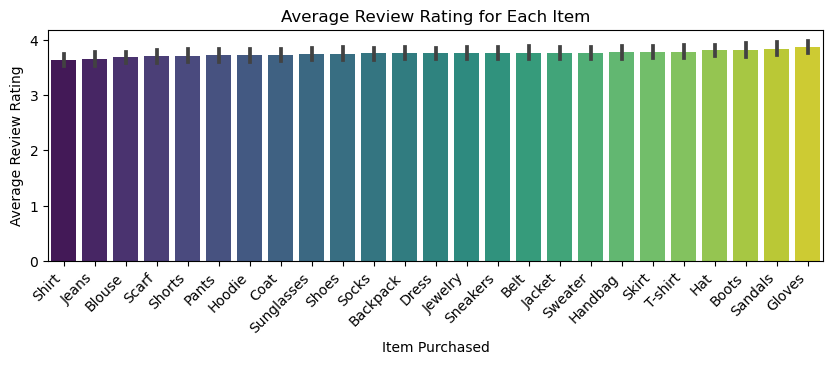

In [77]:
# Create a bar chart to visualize the average review rating for each item
plt.figure(figsize=(10, 3))
sns.barplot(x='Item Purchased', y='Review Rating', data=df, order=df.groupby('Item Purchased')['Review Rating'].mean().sort_values().index, palette='viridis')
plt.title('Average Review Rating for Each Item')
plt.xlabel('Item Purchased')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


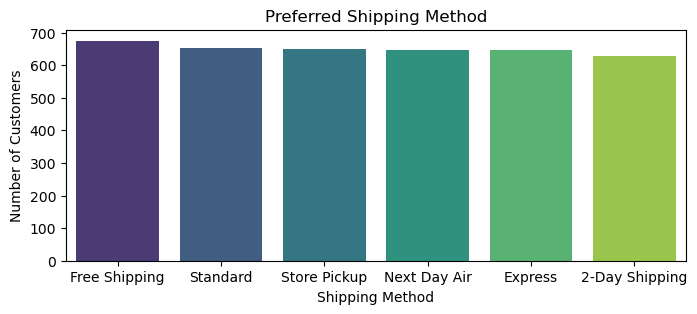

In [81]:
# Count the occurrences of each shipping method
shipping_counts = df['Shipping Type'].value_counts()

# Create a bar chart to visualize the preferred shipping method
plt.figure(figsize=(8, 3))
sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette='viridis')
plt.title('Preferred Shipping Method')
plt.xlabel('Shipping Method')
plt.ylabel('Number of Customers')
plt.show()


In [82]:
pip install wordcloud

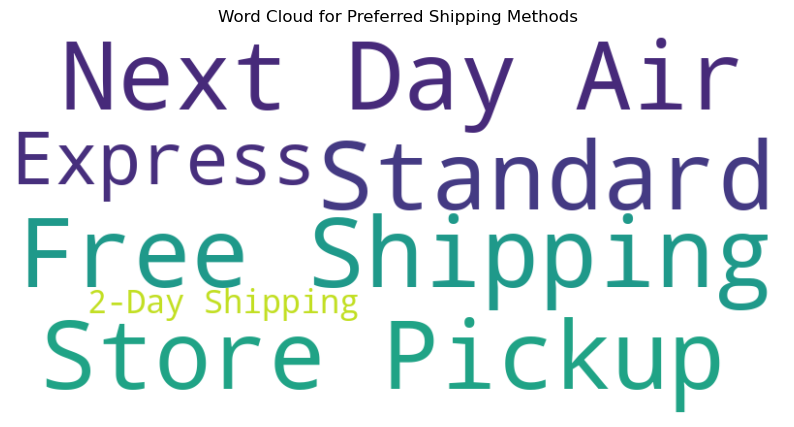

In [90]:
# Generate a word cloud for the preferred shipping methods
shipping_counts = df['Shipping Type'].value_counts().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white', prefer_horizontal=1, colormap='viridis').generate_from_frequencies(shipping_counts)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Preferred Shipping Methods')
plt.show()



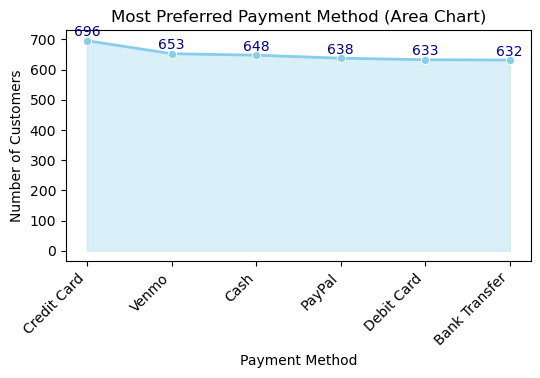

In [84]:
# Count the occurrences of each payment method
payment_counts = df['Payment Method'].value_counts()

# Create an area chart with user counts for each payment method
plt.figure(figsize=(6, 3))
sns.lineplot(x=payment_counts.index, y=payment_counts.values, color='skyblue', marker='o', linewidth=2)
plt.fill_between(payment_counts.index, payment_counts.values, color='skyblue', alpha=0.3)

# Annotate the area chart with user counts
for x, y in zip(payment_counts.index, payment_counts.values):
    plt.text(x, y + 5, f'{y}', ha='center', va='bottom', fontsize=10, color='darkblue')

plt.title('Most Preferred Payment Method (Area Chart)')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()


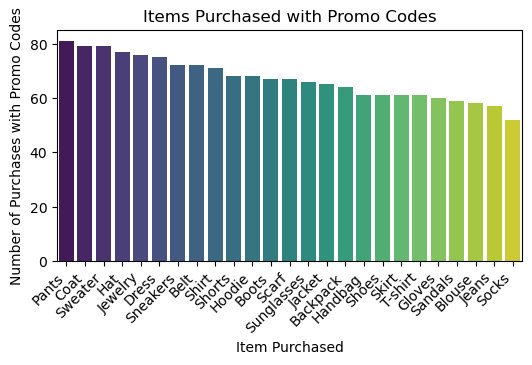

In [85]:


# Filter data for items where promo codes were used
promo_items = df[df['Promo Code Used'] == 'Yes']

# Count the occurrences of each item
item_counts = promo_items['Item Purchased'].value_counts()

# Create a bar chart to visualize items with promo codes
plt.figure(figsize=(6, 3))
sns.barplot(x=item_counts.index, y=item_counts.values, palette='viridis')
plt.title('Items Purchased with Promo Codes')
plt.xlabel('Item Purchased')
plt.ylabel('Number of Purchases with Promo Codes')
plt.xticks(rotation=45, ha='right')
plt.show()
